
Building Your First Neural Network

Last Updated: February 14th, 2025

Daily Challenge: Building Your First Neural Network on the MNIST Dataset


👩‍🏫 👩🏿‍🏫 What You’ll learn

    How to load and preprocess the MNIST dataset
    How to build and train a simple neural network for digit classification
    How to evaluate a neural network’s performance using accuracy metrics
    How to optimize model performance through hyperparameter tuning


🛠️ What you will create

    A fully connected neural network for recognizing handwritten digits
    A training pipeline to learn from the MNIST dataset
    A visualization of the model’s performance on test images
    A basic hyperparameter tuning experiment


What You Need to Do

1. Load and Preprocess the MNIST Dataset

    Load the MNIST dataset using TensorFlow/Keras
    Normalize the image pixel values to be between 0 and 1
    Convert labels into one-hot encoded format
    Split the dataset into training and test sets
    Display sample images with their corresponding labels

2. Build a Fully Connected Neural Network

    Define a sequential model using Keras
    Flatten the 28x28 input images into a single vector
    Add two hidden layers with ReLU activation
    Add an output layer with Softmax activation for multi-class classification
    Compile the model using categorical cross-entropy as the loss function and accuracy as the evaluation metric

3. Train the Neural Network

    Fit the model to the training data for 10 epochs
    Use a validation set to track performance during training
    Observe the loss and accuracy trends over the epochs

4. Evaluate the Model’s Performance

    Compute accuracy on the test dataset
    Display a confusion matrix for misclassified digits
    Identify which digits the model struggles with the most


In [6]:
import sys
print(sys.executable)

c:\Users\mathi\Downloads\Projet_IA\tf_env\Scripts\python.exe


In [ ]:
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay
from sklearn.linear_model import Lasso, Ridge

# Load MNIST dataset
np.random.seed(42)
tf.random.set_seed(42)

In [8]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 13s 1us/step


In [9]:
print(f"Training data shape: {x_train.shape}, Labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}, Labels shape: {y_test.shape}")

Training data shape: (60000, 28, 28), Labels shape: (60000,)
Test data shape: (10000, 28, 28), Labels shape: (10000,)


In [10]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [11]:
from tensorflow.keras.utils import to_categorical

In [12]:
num_classes = 10
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

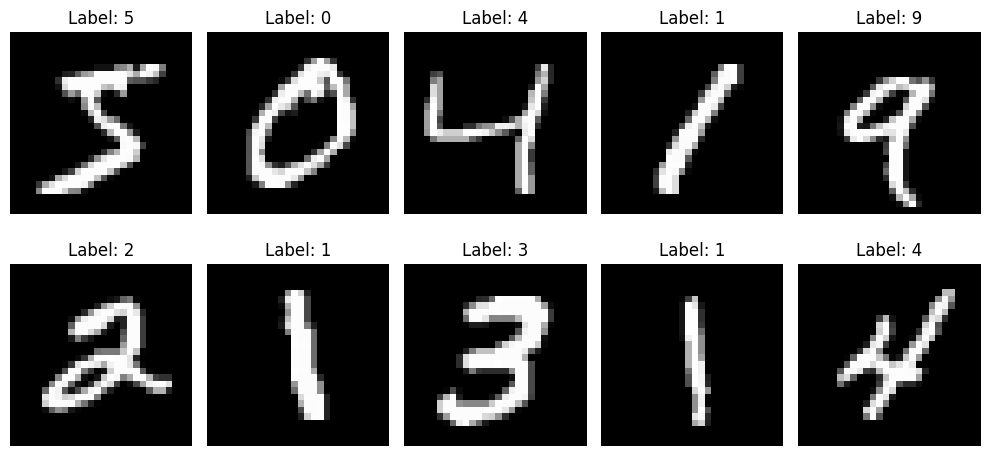

In [13]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {np.argmax(y_train[i])}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [14]:
ffn = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])


c:\Users\mathi\Downloads\Projet_IA\tf_env\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
ffn.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [16]:
#Apprend à prédire les chiffres à partir des images validation_split=0.2 = garde 20% des données pour vérifier les progrès pendant l'entraînement
ffn.fit(x_train, y_train, epochs=10, validation_split=0.2,verbose=2)

#Donne la perte (loss) et l’accuracy sur des données jamais vues
ffn.evaluate(x_test, y_test)

#Donne la probabilité de chaque chiffre pour chaque image
predictions = ffn.predict(x_test)
np.argmax(predictions[0])  # Affiche le chiffre prédit pour la première image
ffn.save('mnist_ffn.h5')  # Sauvegarde le modèle

Epoch 1/10
1500/1500 - 5s - 3ms/step - accuracy: 0.9222 - loss: 0.2683 - val_accuracy: 0.9586 - val_loss: 0.1417
Epoch 2/10
1500/1500 - 4s - 3ms/step - accuracy: 0.9664 - loss: 0.1134 - val_accuracy: 0.9647 - val_loss: 0.1200
Epoch 3/10
1500/1500 - 4s - 3ms/step - accuracy: 0.9778 - loss: 0.0749 - val_accuracy: 0.9651 - val_loss: 0.1175
Epoch 4/10
1500/1500 - 4s - 3ms/step - accuracy: 0.9840 - loss: 0.0534 - val_accuracy: 0.9695 - val_loss: 0.1151
Epoch 5/10
1500/1500 - 4s - 3ms/step - accuracy: 0.9875 - loss: 0.0406 - val_accuracy: 0.9709 - val_loss: 0.1070
Epoch 6/10
1500/1500 - 4s - 2ms/step - accuracy: 0.9897 - loss: 0.0327 - val_accuracy: 0.9728 - val_loss: 0.1119
Epoch 7/10
1500/1500 - 4s - 2ms/step - accuracy: 0.9913 - loss: 0.0266 - val_accuracy: 0.9728 - val_loss: 0.1168
Epoch 8/10
1500/1500 - 4s - 2ms/step - accuracy: 0.9921 - loss: 0.0237 - val_accuracy: 0.9732 - val_loss: 0.1255
Epoch 9/10
1500/1500 - 4s - 3ms/step - accuracy: 0.9931 - loss: 0.0198 - val_accuracy: 0.9724 - 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


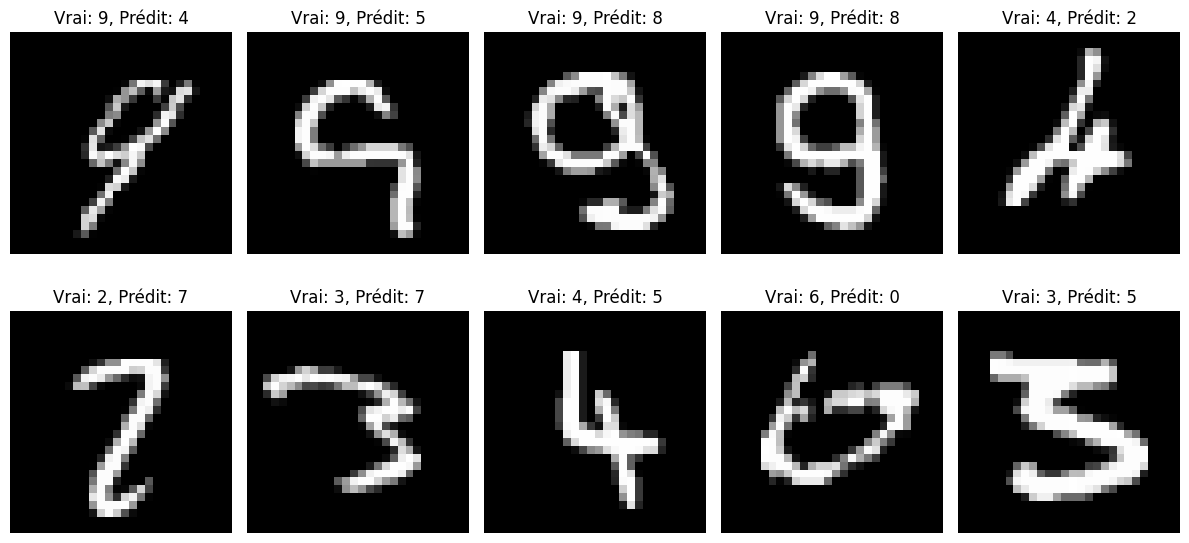

In [17]:
# Prédictions sur les données de test
y_pred = ffn.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# On récupère les indices des erreurs
errors = np.where(y_pred_classes != y_true)[0]

# Afficher quelques erreurs
plt.figure(figsize=(12, 6))
for i in range(10):
    idx = errors[i]
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[idx], cmap='gray')
    plt.title(f"Vrai: {y_true[idx]}, Prédit: {y_pred_classes[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

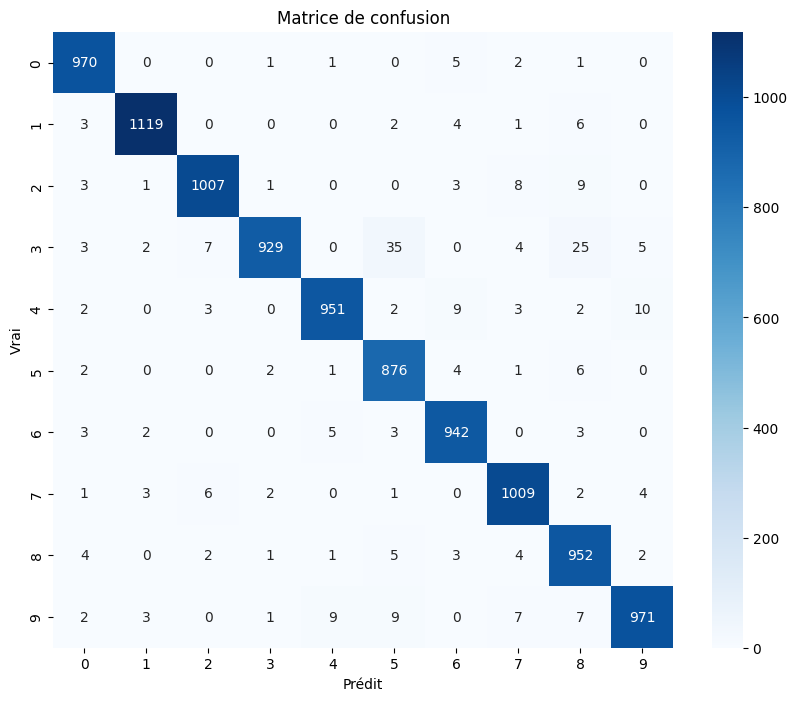

In [18]:
conf_matrix = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Prédit")
plt.ylabel("Vrai")
plt.title("Matrice de confusion")
plt.show()

Erreur la plus fréquente : le modèle a confondu 3 avec 5


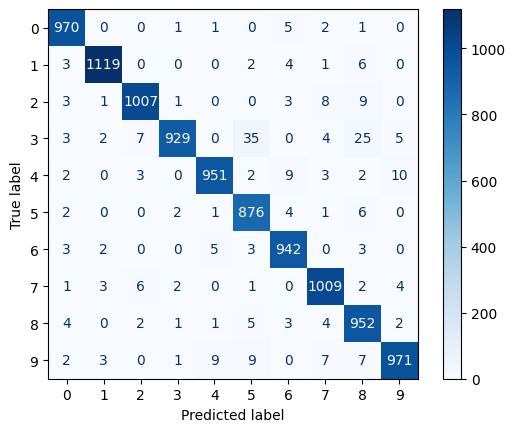

In [19]:
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')

cm_df = pd.DataFrame(cm, index=range(10), columns=range(10))

# On annule la diagonale (les bonnes prédictions)
np.fill_diagonal(cm, 0)

# Trouver les plus grosses erreurs
erreurs_les_plus_frequentes = np.unravel_index(np.argmax(cm), cm.shape)
print(f"Erreur la plus fréquente : le modèle a confondu {erreurs_les_plus_frequentes[0]} avec {erreurs_les_plus_frequentes[1]}")